In [19]:
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
base_url = "http://agbc-fe.pdn.ac.lk/api/v1/data/?sensor=10008&date="

start_date = pd.to_datetime("2020-10-22")
end_date = pd.to_datetime("2021-03-14")

date_range = pd.date_range(start=start_date, end=end_date, freq="D")

all_data = []

def fetch_data(date):
    date_str = date.strftime("%Y-%m-%d")
    url = base_url + date_str

    try:
        response = requests.get(url)
        data = response.json()
        return data['data']
    except:
        print(f"Error: Could not retrieve data for date {date_str}")
        return []

start_time = time.time()  # Get the current time before starting the execution


# Create a ThreadPoolExecutor with the maximum number of workers
executor = ThreadPoolExecutor(max_workers=None)

# Use tqdm to track the progress
with tqdm(total=len(date_range), desc="Progress", unit="day") as pbar:
    # Submit the fetch_data task to the executor for each date in parallel
    futures = [executor.submit(fetch_data, date) for date in date_range]
    
    # Retrieve the results from the completed futures
    for future in futures:
        all_data.extend(future.result())
        pbar.update(1)
    

end_time = time.time()  # Get the current time after finishing the execution
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

# Create the DataFrame from the collected data
df = pd.DataFrame(all_data, dtype=str)
print(df.head)


Progress:   0%|          | 0/144 [00:00<?, ?day/s]

Error: Could not retrieve data for date 2020-10-31


Progress:  53%|█████▎    | 76/144 [00:55<00:49,  1.38day/s]


KeyboardInterrupt: 

In [ ]:
import numpy as np
# Replace '?' with NaN

df.replace(' ?', np.nan, inplace=True)

# Assuming df is your DataFrame
df.dropna(inplace=True)

print(df.head(10))

   siteId seqNo         date       time  temp1  temp2  temp3 humidity1  \
0       0     1   2020-10-22   00:00:01   23.3   23.8   23.2      98.9   
2       0     3   2020-10-22   00:00:31   23.2   23.8   23.3      98.8   
3       0     4   2020-10-22   00:00:46   23.3   23.8   23.3      98.6   
4       0     5   2020-10-22   00:01:01   23.2   23.8   23.2      98.5   
5       0     6   2020-10-22   00:01:16   23.2   23.9   23.2      98.9   
9       0    10   2020-10-22   00:02:16   23.3   23.9   23.2      98.8   
10      0    11   2020-10-22   00:02:31   23.3   23.9   23.2      98.9   
12      0    13   2020-10-22   00:03:01   23.3   23.8   23.3      98.3   
13      0    14   2020-10-22   00:03:16   23.3   23.9   23.3      98.1   
15      0    16   2020-10-22   00:03:46   23.3   23.8   23.3        98   

   humidity2 humidity3   light  
0         95        95   1.042  
2         95        95   1.042  
3         95        95   1.042  
4         95        95   1.042  
5         95        

/Users/karanrasathurai/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


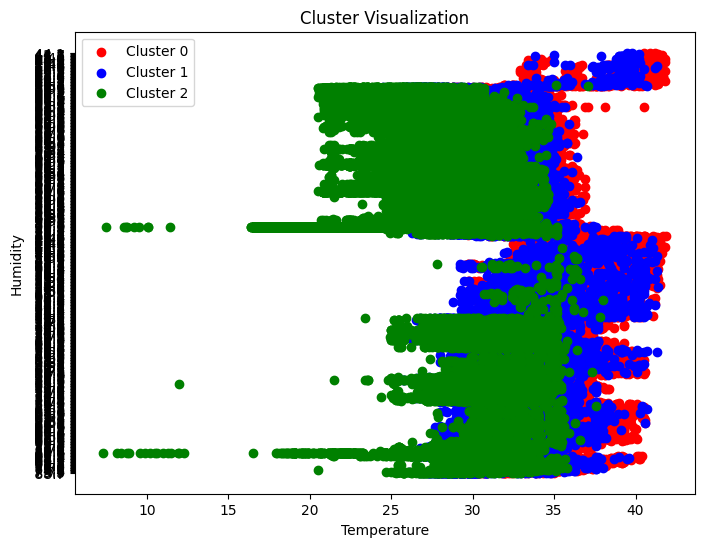

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = df # Replace "your_dataset.csv" with the actual filename/path

# Select the relevant columns for clustering
columns = ['temp1', 'temp2', 'temp3', 'humidity1', 'humidity2', 'humidity3', 'light']
X = data[columns]

# Handle missing values
X = X.replace('?', float('nan')).astype(float)  # Replace '?' with NaN and convert to float

# Perform clustering with K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as desired
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the dataset
data['cluster'] = labels

# Visualize the clusters
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for the clusters
colors = ['red', 'blue', 'green']  # Add more colors if needed

# Plot each data point with its assigned cluster color
for cluster_id in range(kmeans.n_clusters):
    cluster_data = data[data['cluster'] == cluster_id]
    ax.scatter(cluster_data['temp1'], cluster_data['humidity1'], c=colors[cluster_id], label=f'Cluster {cluster_id}')

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_title('Cluster Visualization')
ax.legend()
plt.show()

